# X-Ray Medical Diagnosis Predictor
---

In [161]:
# import libraries
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub # import data via Kaggle API
import os
import glob
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


# Model training libraries
from sklearn.model_selection import train_test_split

## Data Collection/ Extraction
---

In [ ]:
# Download latest version
path = kagglehub.dataset_download("nih-chest-xrays/data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\reala\.cache\kagglehub\datasets\nih-chest-xrays\data\versions\3


In [31]:
# extract data entry file

data_entry_df = pd.read_csv(os.path.join(path,'Data_Entry_2017.csv'))
data_entry_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [80]:
# extract bounding box coordinates

bbox_df = pd.read_csv(os.path.join(path, 'BBox_List_2017.csv'))
bbox_df.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [7]:
# cheking shape of the bounding box data
bbox_df["Image Index"].shape

(984,)

#### [Test]

In [8]:

"""
# extract images and its file name

img_folders = ["images_001", "images_002"]

#, "images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]

# create a nested dictionary containing images and file names for each corresponding file
files = {}

for folder in img_folders:
    files[folder] = {"imgs": [], "name": []}

# defined a function that iterates through each image folder, collecting its file name and reading each image into a numpy array
def extract_imgs(folder_num):
    
    base_path = os.path.join(path, folder_num, "images")
    image_files = glob.glob(os.path.join(base_path, "*.png"))

    for img in image_files:
        opened_img = Image.open(img)
        img_array = np.array(opened_img)
        file_name = os.path.basename(img)

        files[folder_num]["imgs"].append(img_array)
        files[folder_num]["name"].append(file_name)

for folder in img_folders:
    extract_imgs(folder)

"""

'\n# extract images and its file name\n\nimg_folders = ["images_001", "images_002"]\n\n#, "images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]\n\n# create a nested dictionary containing images and file names for each corresponding file\nfiles = {}\n\nfor folder in img_folders:\n    files[folder] = {"imgs": [], "name": []}\n\n# defined a function that iterates through each image folder, collecting its file name and reading each image into a numpy array\ndef extract_imgs(folder_num):\n    \n    base_path = os.path.join(path, folder_num, "images")\n    image_files = glob.glob(os.path.join(base_path, "*.png"))\n\n    for img in image_files:\n        opened_img = Image.open(img)\n        img_array = np.array(opened_img)\n        file_name = os.path.basename(img)\n\n        files[folder_num]["imgs"].append(img_array)\n        files[folder_num]["name"].append(file_name)\n\nfor folder in img_folders:\n    ex

In [9]:
# extract images and its file name

img_folders = ["images_001", "images_002", "images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]

# stores image array conversions and its coresponding name into lists
imgs = []
imgs_names = []


# defined a function that iterates through each image folder, collecting its file name and reading each image into a numpy array 
# converts each image into an array and stores them in a list

"""
def extract_imgs(folder_num):
    
    base_path = os.path.join(path, folder_num, "images")
    image_files = glob.glob(os.path.join(base_path, "*.png"))

    for img in image_files:
        opened_img = Image.open(img)
        img_array = np.array(opened_img)
        file_name = os.path.basename(img)

        imgs.append(img_array)
        imgs_names.append(file_name)

for folder in img_folders:
    extract_imgs(folder)
    
    
    
"""

'\ndef extract_imgs(folder_num):\n    \n    base_path = os.path.join(path, folder_num, "images")\n    image_files = glob.glob(os.path.join(base_path, "*.png"))\n\n    for img in image_files:\n        opened_img = Image.open(img)\n        img_array = np.array(opened_img)\n        file_name = os.path.basename(img)\n\n        imgs.append(img_array)\n        imgs_names.append(file_name)\n\nfor folder in img_folders:\n    extract_imgs(folder)\n    \n    \n    \n'

In [10]:
# extract images and its file name

img_folders_batch_1 = ["images_001", "images_002", "images_003"] 
img_folders_batch_2 = ["images_004", "images_005", "images_006"] 
img_folders_batch_3 = ["images_007", "images_008", "images_009"] 
img_folders_batch_4 = ["images_010", "images_011", "images_012"]

# stores image array conversions and its coresponding name into lists
imgs = []
imgs_names = []


# defined a function that iterates through each image folder, collecting its file name and reading each image into a numpy array 
# converts each image into an array and stores them in a list

def extract_imgs(folder_num):
    
    base_path = os.path.join(path, folder_num, "images")
    image_files = glob.glob(os.path.join(base_path, "*.png"))

    for img in image_files:
        opened_img = Image.open(img)
        img_array = np.array(opened_img)
        file_name = os.path.basename(img)

        imgs.append(img_array)
        imgs_names.append(file_name)


def process_batches(batch_list):

    for folder in batch_list:
        extract_imgs(folder)  # Extract images from the folder

        # After processing the batch, clear the memory
        del imgs
        del imgs_names
        gc.collect()  # Garbage collection to free up memory

# Process each batch one by one
process_batches(img_folders_batch_1)
process_batches(img_folders_batch_2)
process_batches(img_folders_batch_3)
process_batches(img_folders_batch_4)

KeyboardInterrupt: 

In [ ]:
for folder in img_folders_batch_1:
    extract_imgs(folder)

In [ ]:
import gc # import garabage collection module, used for managing memory 

img_folders = ["images_001", "images_002", "images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]

imgs = []
imgs_names = []

def extract_imgs(folder_num):
    base_path = os.path.join(path, folder_num, "images")
    image_files = glob.glob(os.path.join(base_path, "*.png"))

    batch_size = 6000  # Set a reasonable batch size
    for i in range(0, len(image_files), batch_size):
        batch_files = image_files[i:i + batch_size]
        batch_imgs = []
        batch_names = []

        for img in batch_files:
            opened_img = Image.open(img)
            img_array = np.array(opened_img)
            file_name = os.path.basename(img)

            batch_imgs.append(img_array)
            batch_names.append(file_name)

        # Append the batch to the main lists
        imgs.extend(batch_imgs)
        imgs_names.extend(batch_names)

        # Free up memory by clearing the batch and manually triggering garbage collection
        del batch_imgs
        del batch_names
        gc.collect()  # Garbage collection

for folder in img_folders:
    extract_imgs(folder)

KeyboardInterrupt: 

In [ ]:
test = os.path.join(path, "images_001","images", "00000001_000.png")
test_img = Image.open(test)
pixels = np.array(test_img)
pixels

array([[202, 199, 195, ...,   5,   2,   0],
       [199, 196, 195, ...,   5,   2,   0],
       [196, 194, 193, ...,   5,   2,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 254, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
# [Test]
# image size checker
# add?
img_sizes_1 = []

test_base_path = os.path.join(path, "images_001","images")
test_img_files = glob.glob(os.path.join(test_base_path, "*.png"))

for item in test_img_files:
    test_img = Image.open(item)
    print(test_img.size)

(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)

## Data Cleaning
---

##### Clean bbox_df dataframe

In [81]:
# removed unnesscary columns and reformated column names

bbox_df = bbox_df.drop(["Unnamed: 6", "Unnamed: 7", "Unnamed: 8"], axis=1) # removed NaN columns

# reformate columns (lowercase, no spaces)
bbox_df.columns = bbox_df.columns.tolist()

# renamed bbox coordinate columns
# (x_min, y_min) represents the leftmost and uppermost corner of the box (smallest x-value, smallest y-value)
# (x_max, y_max) represents the rightmost and lowermost corner of the box (largest x-value, largest y-value)
bbox_df.columns = ["image_index", "finding_label","x_min", "y_min", "x_max", "y_max"]

bbox_df.head()

,image_index,finding_label,x_min,y_min,x_max,y_max
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [82]:
# checking basic characteristic of the dataset (na values, null values, duplicated values, and checked data type of each column)

print(f'Checking for NA values: \n {bbox_df.isna().sum()}')
print(f'Checking for Null values: \n {bbox_df.isnull().sum()}')
print(f'Checking for duplicated values: \n {bbox_df.duplicated().sum()}')
print(f'Checking data type of each column: \n {bbox_df.info()}')

Checking for NA values: 
 image_index      0
finding_label    0
x_min            0
y_min            0
x_max            0
y_max            0
dtype: int64
Checking for Null values: 
 image_index      0
finding_label    0
x_min            0
y_min            0
x_max            0
y_max            0
dtype: int64
Checking for duplicated values: 
 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_index    984 non-null    object 
 1   finding_label  984 non-null    object 
 2   x_min          984 non-null    float64
 3   y_min          984 non-null    float64
 4   x_max          984 non-null    float64
 5   y_max          984 non-null    float64
dtypes: float64(4), object(2)
memory usage: 46.3+ KB
Checking data type of each column: 
 None


##### Clean data_entry_df dataframe

In [ ]:
# removed unnamed column

data_entry_df = data_entry_df.drop(columns=["Unnamed: 11"],axis=1)

# rename columns 
data_entry_df.columns = data_entry_df.columns.tolist() 
data_entry_df.columns = ["image_index", "finding_labels", "follow_up_number", "patient_id", "patient_age", "patient_gender", "view_position", "original_img_width", "original_img_height", "img_pixel_spacing_x", "img_pixel_spacing_y"]
data_entry_df

In [62]:
# checking basic characteristic of the dataset (na values, null values, duplicated values, and checked data type of each column)

print(f'Checking for NA values: \n {data_entry_df.isna().sum()}')
print(f'Checking for Null values: \n {data_entry_df.isnull().sum()}')
print(f'Checking for duplicated values: \n {data_entry_df.duplicated().sum()}')
print(f'Checking data type of each column: \n {data_entry_df.info()}')

Checking for NA values: 
 image_index            0
finding_labels         0
follow_up_number       0
patient_id             0
patient_age            0
patient_gender         0
view_position          0
original_img_width     0
original_img_height    0
img_pixel_spacing_x    0
img_pixel_spacing_y    0
dtype: int64
Checking for Null values: 
 image_index            0
finding_labels         0
follow_up_number       0
patient_id             0
patient_age            0
patient_gender         0
view_position          0
original_img_width     0
original_img_height    0
img_pixel_spacing_x    0
img_pixel_spacing_y    0
dtype: int64
Checking for duplicated values: 
 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   image_index          112120 non-null  object 
 1   finding_labels       112120 non-null  object 
 2   follow_up_numb

## Exploratory Data Analysis (EDA)
---

In [95]:
data_entry_df.head()

,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_img_width,original_img_height,img_pixel_spacing_x,img_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [ ]:
# basic analysis 

# avg age of patients
print(f'Average age of patients: {data_entry_df["patient_age"].mean().round(2)}') 

# patient gender distribution
male_patients = data_entry_df[data_entry_df['patient_gender']=='M']["patient_gender"].count() # number of male patients
female_patients = data_entry_df[data_entry_df['patient_gender']=='F']["patient_gender"].count() # number of female patients
total_patients = data_entry_df["patient_gender"].count() # total number of patients
print(f'Number of male patients: {male_patients} ({(male_patients/total_patients *100).round(2)}%)')
print(f'Number of female patients: {female_patients} ({(female_patients/total_patients *100).round(2)}%)')



Average age of patients: 46.9
Number of male patients: 63340 (56.49%)
Number of female patients: 48780 (43.51%)


In [129]:
data_entry_df[data_entry_df["patient_id"] == 1]["follow_up_number"].count()

3

In [131]:
unique_patient_ids = data_entry_df["patient_id"].unique()
unique_patient_ids

array([    1,     2,     3, ..., 30803, 30804, 30805], dtype=int64)

In [148]:
patient_follow_ups = []

for patient_id in unique_patient_ids:
    follow_ups = data_entry_df[data_entry_df["patient_id"] == patient_id]["follow_up_number"].count()
    patient_follow_ups.append(follow_ups)

In [149]:

max(patient_follow_ups)

184

In [ ]:
plt.figure(figsize=(15,12))

bins = np.arange(0, 185, 10) # created bins with sizes of 10 up to 185

plt.hist(patient_follow_ups, bins=bins, edgecolor='black', alpha=0.7)

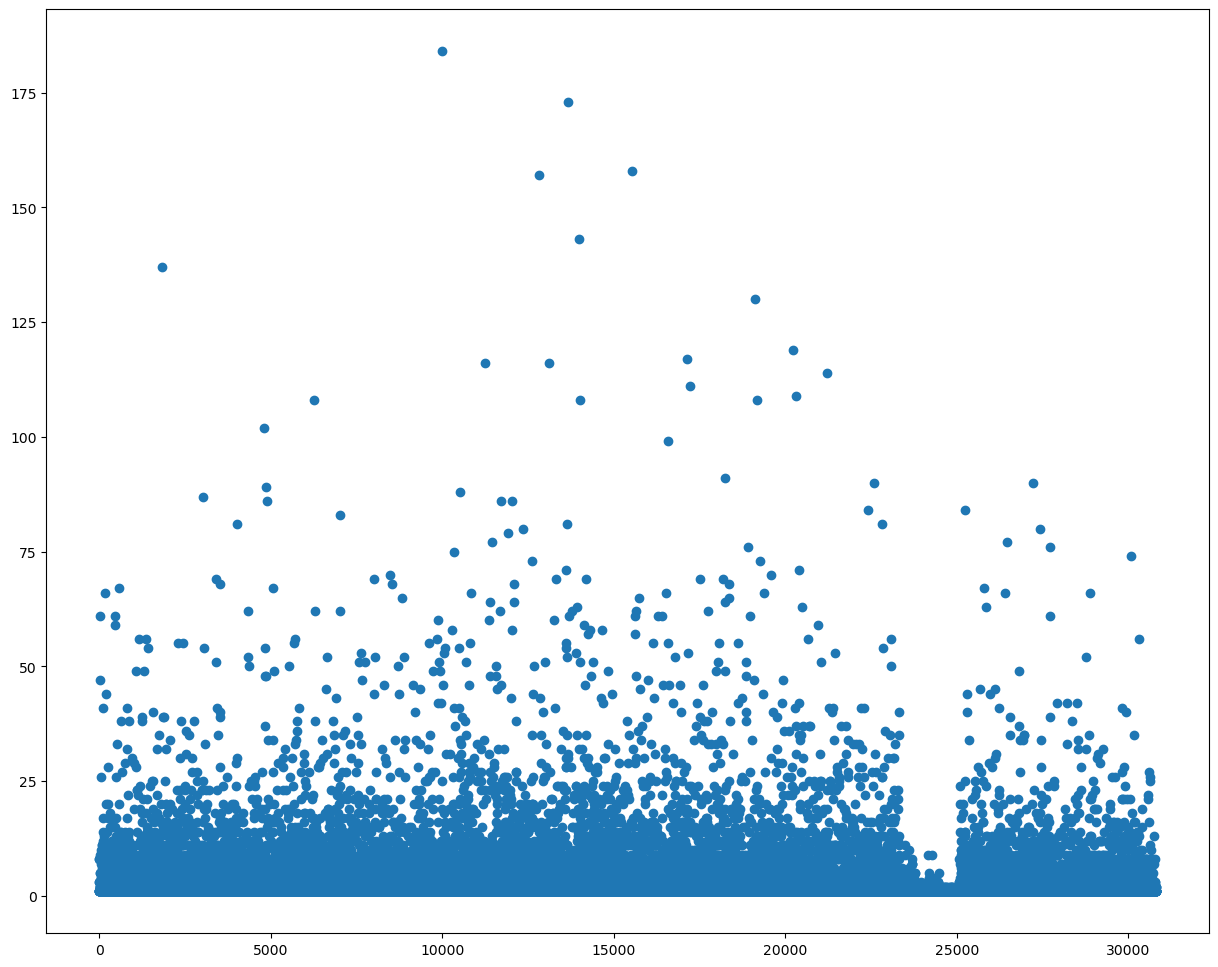

In [154]:
plt.figure(figsize=(15,12))

plt.scatter(unique_patient_ids, patient_follow_ups)

##### remove outliers: Outliers ⇒ a data point is an outlier if... (data < Quartile 1(Q1) - 1.5 * IQR) or (data > Q3 + 1.5 x IQR)

In [160]:
patient_follow_ups = pd.DataFrame(patient_follow_ups, columns=["patient_follow_ups"])
patient_follow_ups.describe()

,patient_follow_ups
count,30805.000000
mean,3.639669
std,7.266734
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,184.000000


In [163]:
stats.iqr(patient_follow_ups)

2.0

## Data Preprocessing

In [79]:
# [Test]
# iterate list to find images within the folders


img_folders = ["images_001", "images_002", "images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]


test = os.path.join(path, "images_006","images", bbox_df["image_index"][0])
test_img = Image.open(test)

test_img.show()

"""
pixels = np.array(test_img)
pixels
"""

'\npixels = np.array(test_img)\npixels\n'

## Feature Engineering

## Model Selection & Training

## Model Evaluation

## Hyperparameter Tuning